In [1]:
from sympy import *
import numpy as np
import scipy as sp
from scipy.linalg import expm 
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
init_printing()
a, b, c, d, y, x, r = symbols('a b c d y x r')

### Additional Resources

- https://www.wolframalpha.com/
- https://www.desmos.com/calculator
- http://bingweb.binghamton.edu/~sayama/textbook/Sayama-opensuny-solutionbook.pdf
- https://milneopentextbooks.org/download/introduction-to-the-modeling-and-analysis-of-complex-systems-sayama-pdf/

### Misc Notes.

- $e^{A} \textbf{x}_i$ = $e^{\lambda_{i}}\textbf{x}_i$
- $A \textbf{x}_i$ = $\lambda_{i}\textbf{x}_i$
- Finding dominant eigenvalue for a $\textbf{discrete}$  system is done finding the largest absolute value of all of the eigenvalues.
- Finding dominant eigenvalue for a $\textbf{continuous}$ system is done finding the largest value of all of the eigenvalues.

### Eigenvector Eigenvalues Using `Numpy`

In [3]:
A = np.array([[0, 1], 
              [-1, 0]])

eigen = np.linalg.eig(A)
eigen

(array([0.+1.j, 0.-1.j]),
 array([[0.70710678+0.j        , 0.70710678-0.j        ],
        [0.        +0.70710678j, 0.        -0.70710678j]]))

### Finding Inverse of Matrix using `Numpy`

In [4]:
B = np.array([[0, 5], 
              [-1, 6]])

inv = np.linalg.inv(B)
inv

array([[ 1.2, -1. ],
       [ 0.2,  0. ]])

### Raising a Matrix to `e` using `Numpy`

In [5]:
e_raised_B = np.exp(B)
e_raised_B

array([[1.00000000e+00, 1.48413159e+02],
       [3.67879441e-01, 4.03428793e+02]])

In [6]:
#Uses Pade Approx.
approx_e_raised_B = sp.linalg.expm(B)
approx_e_raised_B

array([[-33.70543749, 182.11859659],
       [-36.42371932, 184.83687842]])

### Eq. Points using `Sympy`

In [7]:
# 1-D
Xdot = r*x - x**2
eq_pts_1d = solve([Xdot], (x))
eq_pts_1d

In [8]:
# 2-D
Xdot = a * x - b * y * x
Ydot = -c * y + d * y * x
eq_pts_2d = solve([Xdot, Ydot], (x, y))
eq_pts_2d

### Compute Jacobian using `Sympy`

In [9]:
J = Matrix([[Xdot.diff(x), Xdot.diff(y)], 
            [Ydot.diff(x), Ydot.diff(y)]])
J

⎡a - b⋅y    -b⋅x  ⎤
⎢                 ⎥
⎣  d⋅y    -c + d⋅x⎦

### Substitute Eq. Points into Jacobian using `Sympy`

In [10]:
J_eq_1 = J.subs([(x, 0), (y, 0)])
J_eq_1

⎡a  0 ⎤
⎢     ⎥
⎣0  -c⎦

### Compute Eigenvalues and Vectors using `Sympy`

In [11]:
#Values
J_eq_1.eigenvals()

In [12]:
#Vectors
J_eq_1.eigenvects()

⎡⎛      ⎡⎡1⎤⎤⎞  ⎛       ⎡⎡0⎤⎤⎞⎤
⎢⎜a, 1, ⎢⎢ ⎥⎥⎟, ⎜-c, 1, ⎢⎢ ⎥⎥⎟⎥
⎣⎝      ⎣⎣0⎦⎦⎠  ⎝       ⎣⎣1⎦⎦⎠⎦

### 1-D Euler Forward Method (create time-domain plot for continuous function)

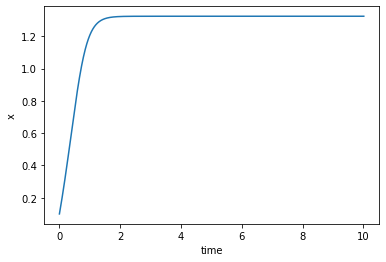

In [13]:
Dt = 0.01
itr = 10

def initialize():
    global x, t, r, xresult, tresult
    x = 0.1
    t = 0.0
    r = 1
    xresult = [x]
    tresult = [t]

def update():
    global x, t, r, xresult, tresult
    dFUNC = r + x - x**3
    nextx = x + (dFUNC) * Dt
    t = t + Dt
    x = nextx
    
def observe():
    global x, t, r, xresult, tresult
    xresult.append(x)
    tresult.append(t)

initialize()
while t < itr:
    update()
    observe()
plt.plot(tresult, xresult)
plt.xlabel('time')
plt.ylabel('x')
plt.show()

### 2-D Euler Forward Method (create time-domain plot for continuous function)

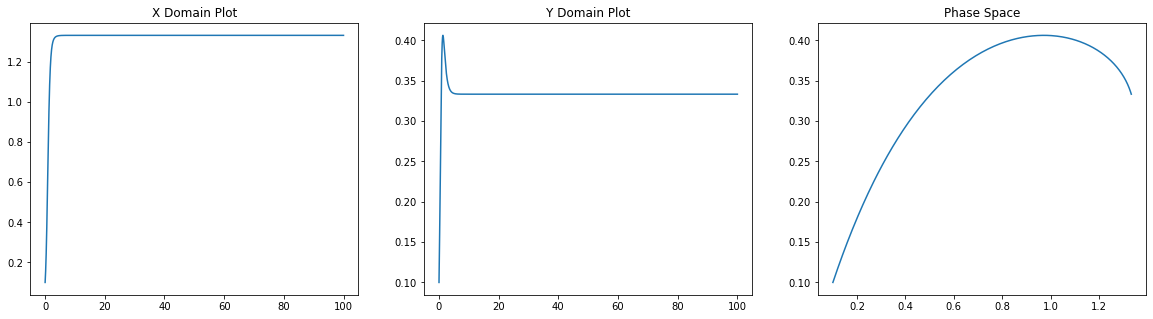

In [14]:
Dt = 0.01
itr = 100

def initialize():
    global x, y, t, xresult, tresult, yresult
    x = 0.1
    y = 0.1
    t = 0.0
    xresult = [x]
    yresult = [y]
    tresult = [t]

def update():
    global x, y, t, xresult, tresult, yresult
    dXFUNC = x*(3-(2*x)-y)
    dYFUNC = y*(3-(5*y)-x)
    nextx = x + (dXFUNC) * Dt
    nexty = y + (dYFUNC) * Dt
    t = t + Dt
    x, y = nextx, nexty
    
def observe():
    global x, y, t, xresult, tresult, yresult
    xresult.append(x)
    yresult.append(y)
    tresult.append(t)

initialize()
while t < itr:
    update()
    observe()
plt.figure(figsize=(20, 5))
plt.subplot(1, 3, 1)
plt.plot(tresult, xresult)
plt.title('X Domain Plot')
plt.subplot(1, 3, 2)
plt.plot(tresult, yresult)
plt.title('Y Domain Plot')
plt.subplot(1, 3, 3)
plt.plot(xresult, yresult)
plt.title('Phase Space')
plt.show()

### Meshgrid using `Numpy` and `Matplotlib`

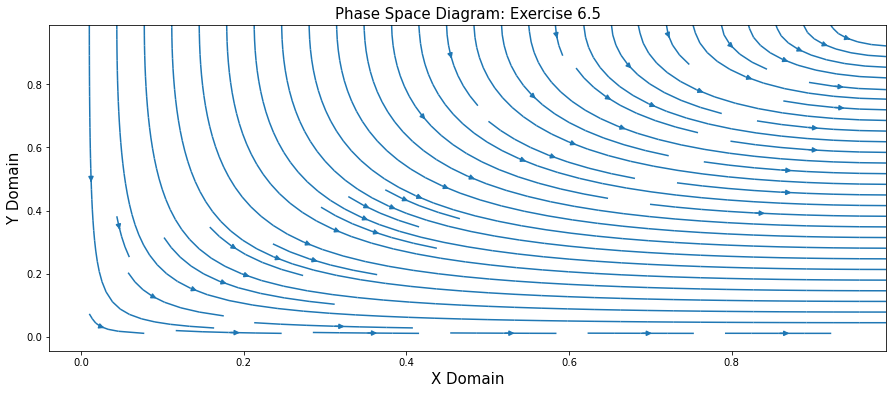

In [15]:
#Exercise 6.5 (Phase Space)
def modelc(aconst, bconst, cconst, dconst, lower, upper, step):
    param_space = np.arange(lower, upper, step)
    y_range, x_range = param_space, param_space

    X, Y = np.meshgrid(x_range, y_range)
    
    Xdot = (aconst * X) - (bconst * X * Y)
    Ydot = (-1 * cconst * Y) + (dconst * X * Y)

    results = {}

    results['X'] = X
    results['Y'] = Y
    results['Xdot'] = Xdot
    results['Ydot' ] = Ydot

    return results

run = modelc(aconst=1, bconst=1, cconst=1, dconst=1, lower=0.01, upper=1, step=0.01)
plt.figure(figsize=(15, 6))
plt.streamplot(run['X'], run['Y'], run['Xdot'], run['Ydot'])
plt.xlabel('X Domain', fontsize=15)
plt.ylabel('Y Domain', fontsize=15)
plt.title('Phase Space Diagram: Exercise 6.5', fontsize=15)
plt.show()

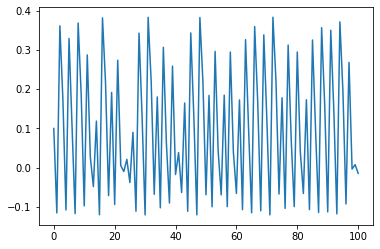

In [16]:
def func(a, x):
    return x + a*x*(1-x)*(x-(1-x))

x = 0.1
a = 3
result = [x]
for _ in range(100):
    x = func(x=x, a=a)
    result.append(x)
plt.plot(result)
plt.show()

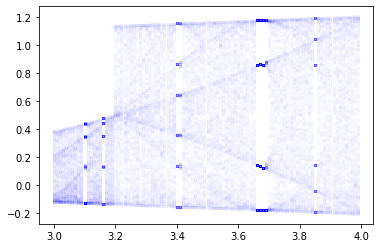

In [17]:
aresult = []
xresult = []
for a in np.arange(3, 4.0, 0.01):
    x = 0.1
    for t in range(500):
        x = func(a=a, x=x)
    for t in range(500):
        x = func(a=a, x=x)
        aresult.append(a)
        xresult.append(x)
plt.plot(aresult, xresult, 'b.', alpha=0.003)
plt.show()

### Worked Solution of Two Nonlinear Equations (Stability)

In [18]:
from sympy import *
import numpy as np
import scipy as sp
from scipy.linalg import expm 
import matplotlib.pyplot as plt
%matplotlib inline

init_printing()
a, b, c, d, y, x, r = symbols('a b c d y x r')

In [19]:
Xdot = x*(3-(2*x)-y)
Ydot = y*(3-(2*y)-x)

#Find Eq. Points
solve([Xdot, Ydot], (x, y))

In [20]:
#Compute Jacobian Matrix

J = Matrix([[Xdot.diff(x), Xdot.diff(y)], 
            [Ydot.diff(x), Ydot.diff(y)]])
J

⎡-4⋅x - y + 3       -x     ⎤
⎢                          ⎥
⎣     -y       -x - 4⋅y + 3⎦

In [21]:
#Substitute Eq. Point 1 into Jacobian
J_eq_1 = J.subs([(x, 0), (y, 0)])
J_eq_1

⎡3  0⎤
⎢    ⎥
⎣0  3⎦

In [22]:
#Determine Eiganvalues of Matrix around Eq. Point 1
J_eq_1.eigenvals() #Since Re(lambda) > 0, model is unstable at Pt 1. 

In [23]:
#Substitute Eq. Point 2 into Jacobian
J_eq_2 = J.subs([(x, 0), (y, 3/2)])
J_eq_2

⎡1.5    0  ⎤
⎢          ⎥
⎣-1.5  -3.0⎦

In [24]:
#Determine Eiganvalues of Matrix around Eq. Point 2
J_eq_2.eigenvals() #Since 1 Re(lambda) > 0 and 1 Re(lambda) < 0, model is unstable at Pt 2. 

In [25]:
#Substitute Eq. Point 3 into Jacobian
J_eq_3 = J.subs([(x, 1), (y, 1)])
J_eq_3

⎡-2  -1⎤
⎢      ⎥
⎣-1  -2⎦

In [26]:
#Determine Eiganvalues of Matrix around Eq. Point 3
J_eq_3.eigenvals() #Since both Re(lambda) < 0 model is stable at Pt 3. 

In [27]:
#Substitute Eq. Point 4 into Jacobian
J_eq_4 = J.subs([(x, 3/2), (y, 0)])
J_eq_4

⎡-3.0  -1.5⎤
⎢          ⎥
⎣ 0    1.5 ⎦

In [28]:
#Determine Eiganvalues of Matrix around Eq. Point 4
J_eq_4.eigenvals() #Since 1 Re(lambda) > 0 and 1 Re(lambda) < 0, model is unstable at Pt 4. 

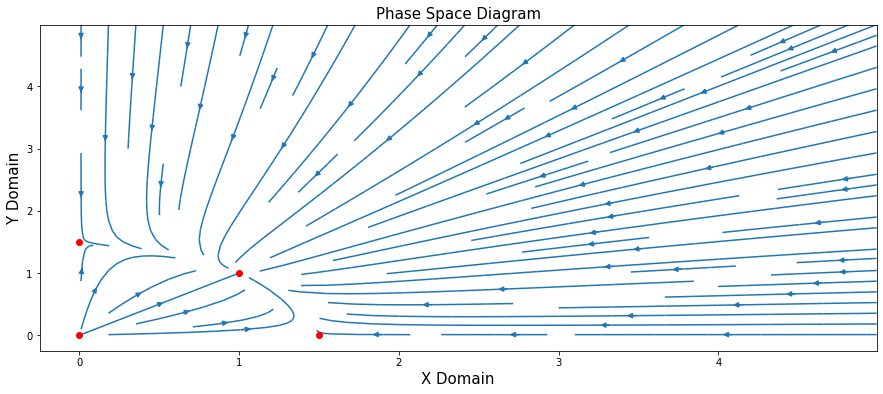

In [29]:
#Model is only stable at (1, 1)
def model(lower, upper, step):
    param_space = np.arange(lower, upper, step)
    y_range, x_range = param_space, param_space

    X, Y = np.meshgrid(x_range, y_range)
        
    Xdot = X*(3-(2*X)-Y)
    Ydot = Y*(3-(2*Y)-X)

    results = {}

    results['X'] = X
    results['Y'] = Y
    results['Xdot'] = Xdot
    results['Ydot' ] = Ydot

    return results

run = model(lower=0.01, upper=5, step=0.01)
plt.figure(figsize=(15, 6))
plt.streamplot(run['X'], run['Y'], run['Xdot'], run['Ydot'])
plt.xlabel('X Domain', fontsize=15)
plt.ylabel('Y Domain', fontsize=15)
plt.plot([1], [1], 'ro')
plt.plot([0], [0], 'ro')
plt.plot([0], [3/2], 'ro')
plt.plot([3/2], [0], 'ro')
plt.title('Phase Space Diagram', fontsize=15)
plt.show()

### Cobweb Plot

A cobweb plot can be created in four steps.

1. Start at the initial condition.
2. Drive up from that condiction till you hit the curve.
3. From the curve, drive to the left or right to hit the line y=x.
4. Drive up/down till you hit the curve.
5. Repeat steps 3 and 4.

If the cobweb plot converges to a single point, the point is stable. If the cobweb plot does not coverge to a single point (i.e., goes on) then the point is not stable.

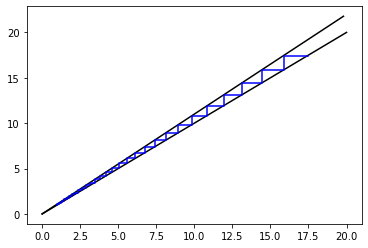

In [30]:
from pylab import *

a = 1.1

def initialize():
    global x, result
    x = 1.
    result = [x]

def observe():
    global x, result
    result.append(x)

def f(x): ### iterative map is now defined as f(x)
    return a * x

def update():
    global x, result
    x = f(x)

initialize()
for t in range(30):
    update()
    observe()

### drawing diagonal line
xmin, xmax = 0, 20
plot([xmin, xmax], [xmin, xmax], 'k')

### drawing curve
rng = arange(xmin, xmax, (xmax - xmin) / 100.)


plot(rng, [f(each) for each in rng], 'k')

### drawing trajectory
horizontal = [result[0]]
vertical = [result[0]] 
for x in result[1:]:
    horizontal.append(vertical[-1])
    vertical.append(x)
    horizontal.append(x)
    vertical.append(x)    
plot(horizontal, vertical, 'b')

show()

### Equlibrium Analysis (Exercise 5.16): Discrete Stability Analysis

In [31]:
from sympy import *
import numpy as np
import scipy as sp
from scipy.linalg import expm 
import matplotlib.pyplot as plt
%matplotlib inline

init_printing()
a, b, c, d, y, x, r = symbols('a b c d y x r')

Xdot = x + 2*x*(1-x)-(x*y)
Ydot = y + 2*y*(1-y)-(x*y)

FXdot = x + 2*x*(1-x)-(x*y) - x
FYdot = y + 2*y*(1-y)-(x*y) - y

In [32]:
eq_pts = solve([FXdot, FYdot], (x, y))
eq_pts

In [33]:
J = Matrix([[FXdot.diff(x), FXdot.diff(y)], 
            [FYdot.diff(x), FYdot.diff(y)]])
J

⎡-4⋅x - y + 2       -x     ⎤
⎢                          ⎥
⎣     -y       -x - 4⋅y + 2⎦

In [34]:
J_eq = J.subs([(x, 2/3), (y, 2/3)])
J_eq

⎡-1.33333333333333   -0.666666666666667⎤
⎢                                      ⎥
⎣-0.666666666666667  -1.33333333333333 ⎦

In [35]:
J_eq.eigenvals()
#Discrete system.

In [36]:
# |-2| = 2 => lambda > 1 # Stable
# |0.667| = 0.667 lambda < 1 #Unstable
# The point (2/3, 2/3) is a saddle point. 

### Summary of Discrete Stability Criteria
![](../chapter-5.png)

### Summary of Discrete Stability Criteria
![](../chapter-7.png)

### Period-Doubling Bifurcation

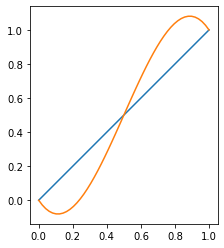

In [37]:
def f(x):
    return x + a * x * (1-x) * (x-(1-x))

a = 2.5
domain = np.linspace(0, 1)
plt.plot(domain, domain)
plt.plot(domain, f(domain))
plt.axis('image')
plt.show()

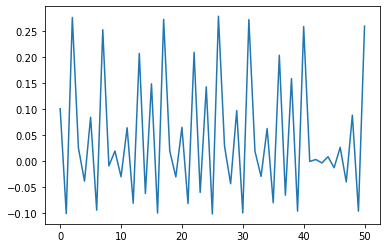

In [38]:
a = 2.8
x = 0.1
result = [x]
for _ in range(50):
    x = f(x)
    result.append(x)
plt.plot(result)
plt.show()

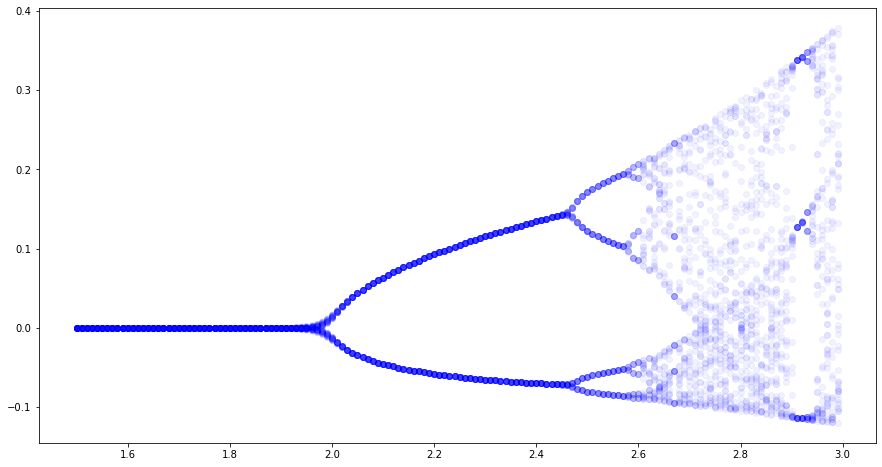

In [39]:
aresult = []
xresult = []
for a in np.arange(1.5, 3, 0.01):
    x = 0.1
    for t in range(50):
        x = f(x)    
    for t in range(50):
        x = f(x)
        aresult.append(a)
        xresult.append(x)
plt.figure(figsize=(15,8))
plt.plot(aresult, xresult, 'bo', alpha=0.05)
plt.show()

### Hopf Bifurcation

In [40]:
x, y, a, b, c, d, J, K = symbols('x, y, a, b, c, d, J K')
xdot = a*x*(1-x/K) - b*J*x/(J+x)*y
ydot = -c*y + d*J*x/(J+x)*y

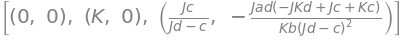

In [41]:
eq = solve([xdot, ydot], (x, y))
eq

In [42]:
J = Matrix([[xdot.diff(x), xdot.diff(y)], 
            [ydot.diff(x), ydot.diff(y)]])
J

⎡J⋅b⋅x⋅y    J⋅b⋅y     ⎛    x⎞   a⋅x   -J⋅b⋅x  ⎤
⎢──────── - ───── + a⋅⎜1 - ─⎟ - ───   ─────── ⎥
⎢       2   J + x     ⎝    K⎠    K     J + x  ⎥
⎢(J + x)                                      ⎥
⎢                                             ⎥
⎢          J⋅d⋅x⋅y    J⋅d⋅y          J⋅d⋅x    ⎥
⎢        - ──────── + ─────          ───── - c⎥
⎢                 2   J + x          J + x    ⎥
⎣          (J + x)                            ⎦

In [43]:
J_eq0 = J.subs([(x, 0), (y, 0)])
J_eq0

⎡a  0 ⎤
⎢     ⎥
⎣0  -c⎦

In [44]:
J_eq0.eigenvals()

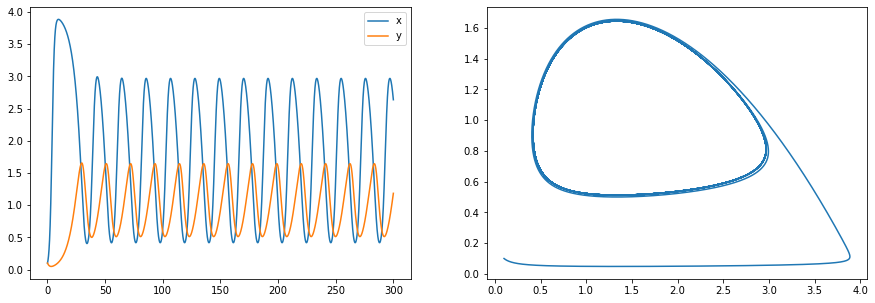

In [45]:
Dt = 0.01
def initialize():
    global x, y, t, xresult, yresult, tresult
    x = 0.1
    y = 0.1
    t = 0.0
    xresult = [x]
    yresult = [y]
    tresult = [t]
def update():
    global x, y, t
    xdot = a*x*(1-x/K) - b*J*x/(J+x)*y
    ydot = -c*y + d*J*x/(J+x)*y
    nx = x + (xdot) * Dt
    ny = y + (ydot) * Dt
    x, y = nx, ny
    t = t + Dt
def observe():
    global x, y, t, xresult, yresult, tresult
    xresult.append(x)
    yresult.append(y)
    tresult.append(t)

a=1
b=1.5
c=0.5
d=1
J=0.8
K=4
initialize()
while t < 300:
    update()
    observe()
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.plot(tresult, xresult, label = 'x')
plt.plot(tresult, yresult, label = 'y')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(xresult, yresult)
plt.show()